<a href="https://colab.research.google.com/github/AhzamAhmed6/CIFAR-using-CNN/blob/main/28PyTorch_CIFAR_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
my_transforms = transforms.Compose(
    [  # Compose makes it possible to have many transforms
        transforms.Resize((36, 36)),  # Resizes (32,32) to (36,36)
        transforms.RandomCrop((32, 32)),  # Takes a random (32,32) crop
        transforms.ColorJitter(brightness=0.5),  # Change brightness of image
        transforms.RandomRotation(degrees=45),  # Perhaps a random rotation from -45 to 45 degrees
        transforms.RandomHorizontalFlip(p=0.5),  # Flips the image horizontally with probability 0.5
        transforms.RandomVerticalFlip(p=0.05),  # Flips image vertically with probability 0.05
        transforms.RandomGrayscale(p=0.2),  # Converts to grayscale with probability 0.2
        transforms.ToTensor(),  # Finally converts PIL image to tensor so we can train w. pytorch
        # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),  # Note: these values aren't optimal
    ]
)

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    download=True,
    transform=my_transforms
)
test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    download=False,
    transform=my_transforms
)

batch_size=128
train_loader = torch.utils.data.DataLoader(
    shuffle=True,
    dataset=train_dataset,
    batch_size=batch_size
)

test_loader = torch.utils.data.DataLoader(
    shuffle=False,
    dataset=test_dataset,
    batch_size=batch_size
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


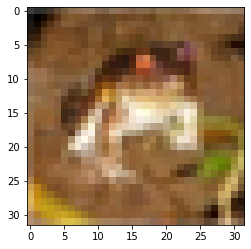

In [ ]:
plt.imshow(train_dataset.data[0])

In [ ]:
# model = nn.Sequential(
#     nn.Conv2d(3, 6, 3),
#     nn.ReLU(),
#     nn.MaxPool2d(2,2),
#     nn.BatchNorm2d(6),
#     nn.Conv2d(6, 16, 3),
#     nn.ReLU(),
#     nn.MaxPool2d(2,2),
#     nn.BatchNorm2d(16),
#     # nn.Conv2d(16, 32, 3),
#     # nn.ReLU(),
#     # nn.MaxPool2d(2,2),
#     # nn.BatchNorm2d(32)
#     nn.Flatten(-1, 16*5*5),
#     nn.Linear(16*5*5, 120),
#     nn.ReLU(),
#     nn.Linear(120, 84),
#     nn.ReLU(),
#     nn.Linear(84, 10),
#     nn.ReLU(),
# )

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),  
    nn.BatchNorm2d(6),  
    nn.Conv2d(6, 16, 5),
    nn.ReLU(),
    nn.BatchNorm2d(16),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(16*5*5, 120),
    nn.Linear(120, 84),
    nn.Linear(84, 10)
)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): ReLU()
  (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=400, out_features=120, bias=True)
  (10): Linear(in_features=120, out_features=84, bias=True)
  (11): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
k = len(set(train_dataset.targets))
k

10

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
def traning(train_loader, test_loader, criterion, optimizer, model, epochs, device):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)
  for i in range(epochs):
    train_loss=[]
    for input, target in train_loader:
      optimizer.zero_grad()
      input, target = input.to(device), target.to(device)
      output = model(input)
      loss = criterion(output, target)
      train_loss.append(loss.item())
      loss.backward()
      optimizer.step()
    train_losses[i] = np.mean(train_loss)
    
    test_loss=[]
    for input, target in test_loader:
      input, target = input.to(device), target.to(device)
      output = model(input)
      loss = criterion(output, target)
      test_loss.append(loss.item())
    test_losses[i] = np.mean(test_loss)
    # print(f'Epoch {i+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
    # print(f"Epochs {i} Train Loss {train_loss:.4f}, Test Loss {test_loss:.4f}")
  return train_losses, test_losses

In [ ]:
epochs=10
train_losses, test_losses = traning(train_loader, test_loader, criterion, optimizer, model, epochs, device)

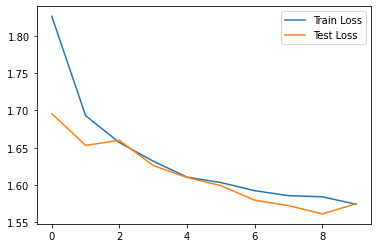

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend();